<a id="1"></a>
<div style="text-align:center; padding:20px 40px; color:white; margin:0; font-size:35px; font-family:Serif; display:fill; border-radius:15px; background-color:#4CAF50; box-sizing: border-box;">
    <b>🍌 Banana Leaf Disease Classification 🍃</b>
</div>

<p style="text-align:center; font-size:20px; font-family:Serif; margin-top:15px;">
    Detecting diseases in banana leaves using Artificial Intelligence 🌱🧠
</p>

<div style="display: flex; justify-content: center; gap: 20px; margin-top: 30px;">
    <div style="text-align:center;">
        <img src="../data/test/healthy/179_aug.jpeg" alt="Healthy Leaf" style="border-radius:10px; border: 2px solid #4CAF50;">
        <p style="color:#4CAF50; font-size:18px;">Healthy</p>
    </div>
    <div style="text-align:center;">
        <img src="../data/test/sigatoka/125_aug.jpeg" alt="Sigatoka Disease" style="border-radius:10px; border: 2px solid #4CAF50;">
        <p style="color:#4CAF50; font-size:18px;">Sigatoka</p>
    </div>
    <div style="text-align:center;">
        <img src="../data/test/cordana/159_aug.jpeg" alt="Cordana Disease" style="border-radius:10px; border: 2px solid #4CAF50;">
        <p style="color:#4CAF50; font-size:18px;">Cordana</p>
    </div>
    <div style="text-align:center;">
        <img src="../data/test/pestalotiopsis/120_aug.jpeg" alt="Pestalotiopsis Disease" style="border-radius:10px; border: 2px solid #4CAF50;">
        <p style="color:#4CAF50; font-size:18px;">Pestalotiopsis</p>
    </div>
</div>

<p style="text-align:center; font-size:18px; font-family:Serif; margin-top:20px;">
    <b>Models Used:</b> Transfer Learning with models for classification
</p>

<p style="text-align:center; font-size:18px; font-family:Serif; margin-bottom:20px;">
    <b>Objective:</b> Improve detection of banana leaf diseases for early intervention in agriculture 🍌🌿
</p>


---
<h2 style=text-align:center;>Importación de Bibliotecas</h2>

En esta sección, importamos las bibliotecas necesarias para desarrollar el modelo de clasificación de imágenes

In [1]:
# Bibliotecas de TensorFlow y Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# Bibliotecas de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas de procesamiento de datos y métricas
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

---

<h2 style=text-align:center;>Configuración de las Imágenes y Generadores de Datos</h2>

En esta sección, se definen los parámetros relacionados con el tamaño de las imágenes, los directorios de datos, y el preprocesamiento de imágenes antes de alimentar el modelo.

### Tamaño de las Imágenes
Para garantizar que todas las imágenes de entrada sean del mismo tamaño, se establecen las dimensiones de las imágenes que se utilizarán en el modelo:

- **img_height**: Altura de las imágenes (224 píxeles).
- **img_width**: Ancho de las imágenes (244 píxeles).

Estos valores se establecieron de acuerdo con el tamaño de entrada requerido por la arquitectura de Resnet50.

### Tamaño del Batch
El tamaño del batch, que determina cuántas imágenes se procesan en paralelo durante el entrenamiento, se define como:

- **batch_size**: 32

### Directorios de las Imágenes
Los directorios donde se encuentran almacenadas las imágenes para entrenamiento, validación y prueba:

- **train_dir**: Directorio que contiene las imágenes de entrenamiento.
- **valid_dir**: Directorio que contiene las imágenes de validación.
- **test_dir**: Directorio que contiene las imágenes de prueba.

### Preprocesamiento de las Imágenes
Para mejorar la capacidad del modelo de generalizar, se realizan algunas técnicas de aumentación de datos y preprocesamiento de imágenes:

- **train_datagen**: El generador para el conjunto de entrenamiento aplica las siguientes transformaciones:
  - **rescale**: Normaliza los valores de los píxeles al rango [0, 1].
  - **rotation_range**: Rota las imágenes aleatoriamente hasta 20 grados.
  - **width_shift_range**: Desplaza aleatoriamente la imagen horizontalmente hasta un 20%.
  - **height_shift_range**: Desplaza aleatoriamente la imagen verticalmente hasta un 20%.
  - **shear_range**: Aplica un corte en los ejes de hasta 20%.
  - **zoom_range**: Hace zoom aleatorio en la imagen de hasta un 20%.
  - **horizontal_flip**: Invierte aleatoriamente las imágenes horizontalmente.
  - **fill_mode**: Usa el modo 'nearest' para rellenar los píxeles vacíos tras las transformaciones.

- **valid_datagen**: El generador para el conjunto de validación solo aplica una normalización con el valor de **rescale**.

### Generadores de Datos
Se crean generadores de datos que alimentarán las imágenes al modelo durante el entrenamiento y la validación:

- **train_generator**: Generador para el conjunto de entrenamiento, que toma las imágenes de `train_dir`, las transforma según las configuraciones mencionadas, y genera lotes con el tamaño definido en `batch_size`.
- **valid_generator**: Generador para el conjunto de validación, con un flujo similar al de entrenamiento pero sin aumentación de datos.

Ambos generadores definen que el tipo de clasificación es **categorical** debido a la naturaleza del problema de clasificación con múltiples clases.


In [2]:
# Modelo con ResNet50, el tamaño de las imágenes debe ser 224x224

img_height, img_width = 224, 224
batch_size = 32 

# Directorios de las imágenes

train_dir = '../data/train'
valid_dir = '../data/valid'
test_dir = '../data/test'

# Preprocesamiento de las imágenes

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 655 images belonging to 4 classes.
Found 92 images belonging to 4 classes.


---

<h2 style=text-align:center;>Visualización de Imágenes y Etiquetas de Entrenamiento</h2>

En esta sección, se obtiene un lote de imágenes y etiquetas desde el generador de datos de entrenamiento, y se visualizan algunas de ellas junto con sus etiquetas correspondientes.

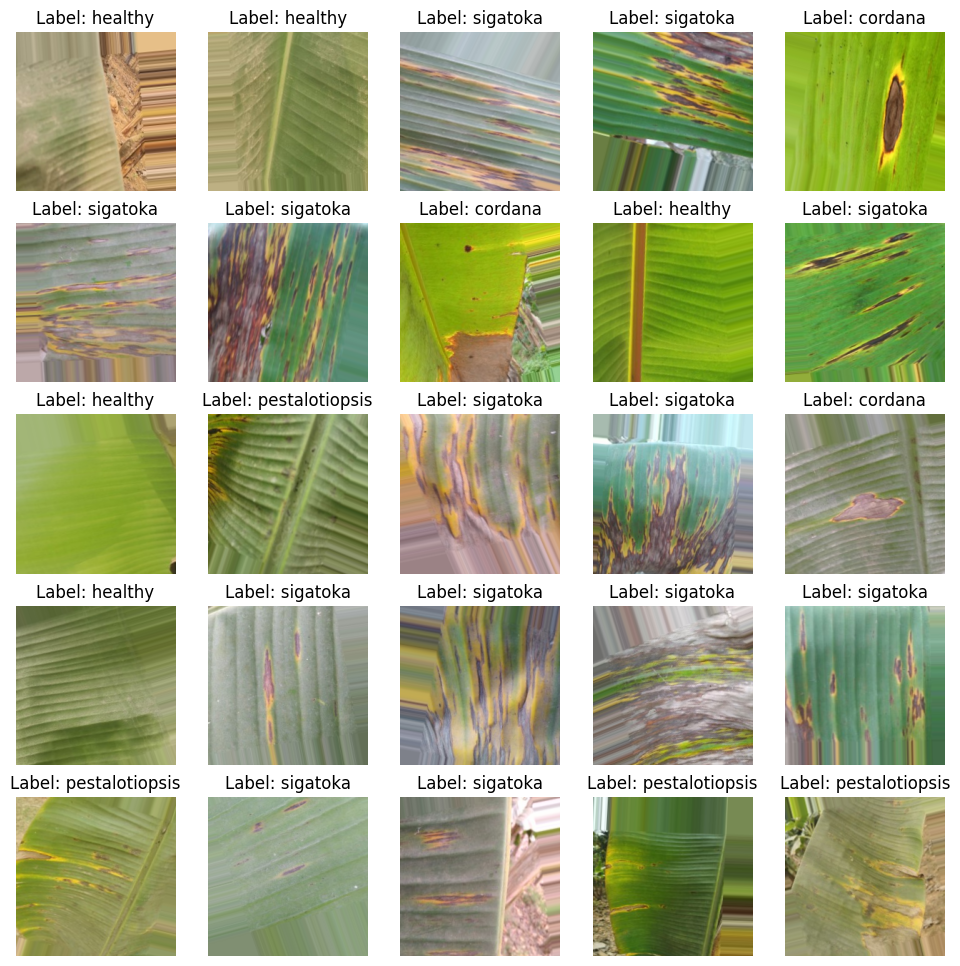

In [3]:
# Obtener un diccionario de clases (nombre -> índice)
class_labels = train_generator.class_indices

# Reiniciar el diccionario para obtener el índice de la clase
class_labels = {v: k for k, v in class_labels.items()}

# Obtener un lote de imágenes y etiquetas
images, labels = next(train_generator)

# Mostrar las imágenes y etiquetas
plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    label_index = labels[i].argmax()  
    plt.title(f'Label: {class_labels[label_index]}')
plt.show()

---

<h2 style=text-align:center;>Cargar el Modelo Base ResNet50</h2>
En esta sección, se carga el modelo base ResNet50, que se utilizará como parte del enfoque de transfer learning para la clasificación de imágenes.

### Modelo Base: ResNet50
ResNet50 es una arquitectura de red neuronal profunda que ha sido preentrenada en el dataset ImageNet. Este modelo es conocido por su capacidad para entrenar redes muy profundas mediante el uso de conexiones residuales, lo que ayuda a mitigar el problema de la degradación en redes profundas. Es una base poderosa para aplicar transfer learning a nuestro problema específico de clasificación de enfermedades en hojas de banana.

### Parámetros del Modelo Base:

- weights='imagenet': Se especifica que se cargarán los pesos preentrenados del modelo, que han sido optimizados utilizando el dataset ImageNet. Esto permite que el modelo aproveche el conocimiento previo adquirido al reconocer una amplia variedad de objetos.
- include_top=False: Esto excluye las capas totalmente conectadas de la parte superior del modelo (la capa de clasificación final). Esta opción es crucial, ya que queremos adaptar las capas superiores del modelo a nuestro problema específico de clasificación de enfermedades en hojas de banana.
- input_shape=(img_height, img_width, 3): Se define el tamaño de las imágenes de entrada que utilizará el modelo, en este caso, de dimensiones 224x224 píxeles con 3 canales (imágenes a color).

In [4]:
# Cargar el modelo base ResNet50

base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))


base_model_resnet.trainable = False

In [5]:
model_resnet = Sequential([
    base_model_resnet,
    GlobalAveragePooling2D(),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(train_generator.num_classes, activation='softmax')
])

model_resnet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,851,012 (90.98 MB)

 Trainable params: 263,044 (1.00 MB)

 Non-trainable params: 23,587,968 (89.98 MB)

In [6]:
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model_resnet.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size,
    epochs=50,
    verbose=1)


d:\Universidad\6toSemeste\IA\Banana-Disease-Clasification\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
 1/20 ━━━━━━━━━━━━━━━━━━━━ 8:45 28s/step - accuracy: 0.3750 - loss: 1.3551

d:\Universidad\6toSemeste\IA\Banana-Disease-Clasification\venv\lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))
d:\Universidad\6toSemeste\IA\Banana-Disease-Clasification\venv\lib\site-packages\PIL\JpegImagePlugin.py:846: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 106s 4s/step - accuracy: 0.4481 - loss: 1.2813 - val_accuracy: 0.4844 - val_loss: 1.2443
Epoch 2/50
 1/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6000 - loss: 0.9581

C:\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step - accuracy: 0.6000 - loss: 0.9581 - val_accuracy: 0.5714 - val_loss: 1.1388
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.5700 - loss: 1.0234 - val_accuracy: 0.5625 - val_loss: 1.4928
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.5938 - loss: 1.1807 - val_accuracy: 0.3929 - val_loss: 2.0755
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 76s 4s/step - accuracy: 0.6565 - loss: 0.9278 - val_accuracy: 0.5156 - val_loss: 1.6982
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step - accuracy: 0.5938 - loss: 0.9708 - val_accuracy: 0.5000 - val_loss: 1.7326
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.6299 - loss: 0.8953 - val_accuracy: 0.4844 - val_loss: 1.6342
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - accuracy: 0.5625 - loss: 0.8429 - val_accuracy: 0.5714 - val_loss: 1.5245
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 76s 4s/step - accuracy: 0.7037 - loss: 0.7724 - val_accuracy: 0.5625 - val_loss: 2.

In [8]:
val_loss, val_accuracy = model_resnet.evaluate(valid_generator)
print(f"Validation accuracy: {val_accuracy:.2f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.5523 - loss: 6.2579
Validation accuracy: 0.51


Found 190 images belonging to 4 classes.


6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step


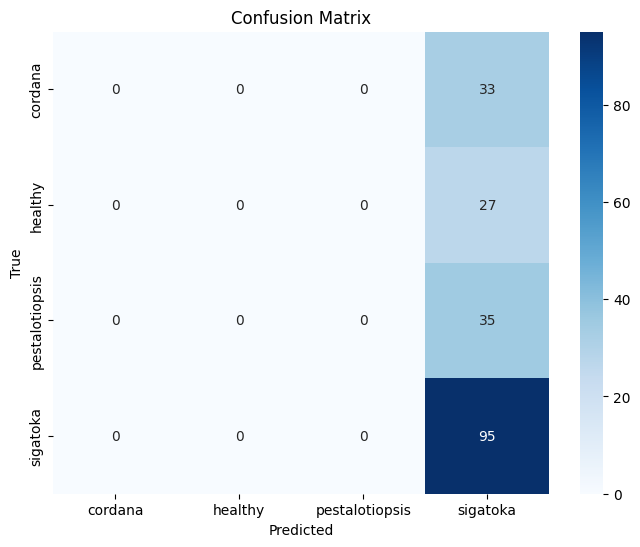

Reporte de Clasificación:
                precision    recall  f1-score   support

       cordana       0.00      0.00      0.00        33
       healthy       0.00      0.00      0.00        27
pestalotiopsis       0.00      0.00      0.00        35
      sigatoka       0.50      1.00      0.67        95

      accuracy                           0.50       190
     macro avg       0.12      0.25      0.17       190
  weighted avg       0.25      0.50      0.33       190



d:\Universidad\6toSemeste\IA\Banana-Disease-Clasification\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Universidad\6toSemeste\IA\Banana-Disease-Clasification\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Universidad\6toSemeste\IA\Banana-Disease-Clasification\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [10]:
# Ruta a tus datos
test_dir = '../data/test'

# Preprocesamiento del conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Importante para obtener las etiquetas en el mismo orden
)

# Obtener las predicciones del modelo
predictions = model_resnet.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)

# Obtener las etiquetas verdaderas
y_true = test_generator.classes

# Obtener los nombres de las clases
class_labels = list(test_generator.class_indices.keys())

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generar el reporte de clasificación con precisión, recall, F1-score, etc.
class_report = classification_report(y_true, y_pred, target_names=class_labels)  # Cambiado aquí
print("Reporte de Clasificación:")
print(class_report)

In [ ]:
# Graficar las curvas de entrenamiento
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, min(len(acc), len(val_acc), len(loss), len(val_loss)) + 1)

    plt.figure(figsize=(12, 5))

    # Precisión
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc[:len(epochs)], 'b-', label='Precisión de entrenamiento')
    plt.plot(epochs, val_acc[:len(epochs)], 'r-', label='Precisión de validación')
    plt.title('Precisión de entrenamiento y validación')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()

    # Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss[:len(epochs)], 'b-', label='Pérdida de entrenamiento')
    plt.plot(epochs, val_loss[:len(epochs)], 'r-', label='Pérdida de validación')
    plt.title('Pérdida de entrenamiento y validación')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.show()

plot_history(history)